In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 8.7 MB/s 


In [ ]:
!pip install -q "tqdm>=4.36.1"

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import os
import zipfile
import pandas as pd
import numpy as np
import pickle
from sklearn.utils import class_weight
from keras import regularizers
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from tensorflow.keras import models
from google.colab import drive
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import tensorflow_datasets as tfds
import tqdm
import tensorflow_addons as tfa
from tensorflow.keras.utils import image_dataset_from_directory
from PIL import Image
import os
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from keras.models import Model
import matplotlib.cm as cm

In [ ]:
model_path = "/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/59_model3.hdf5"
img_path = '/content/drive/Shareddrives/DeepLearningProject/10_left.jpeg'

In [ ]:
images_per_row = 16

In [ ]:
def display_feature_maps():
  import matplotlib.pyplot as plt

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')
    
plt.show()

NameError: ignored

#Layers activation

In [ ]:
# We preprocess the image into a 4D tensor

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)

img_tensor = np.expand_dims(img_tensor, axis=0)

# Its shape is (1, 180, 180, 1)
print(img_tensor.shape)

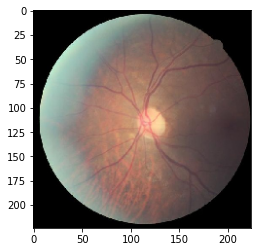

In [ ]:
plt.imshow(img_tensor[0].astype('uint8'))
plt.show()

## CNN from scratch

In [ ]:
model_path = ('/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/59_model3.hdf5')

In [ ]:
model = tf.keras.models.load_model(model_path)

model.summary()

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        print(layer.name)
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                 

In [ ]:
activations = activation_model.predict(img_tensor)
for out in activations:
  print(out.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


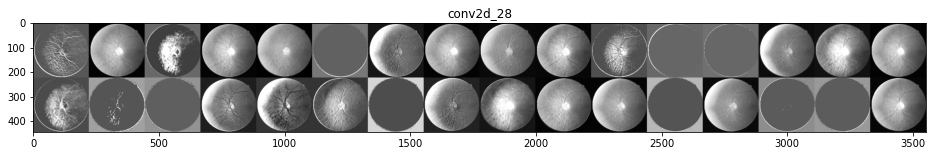

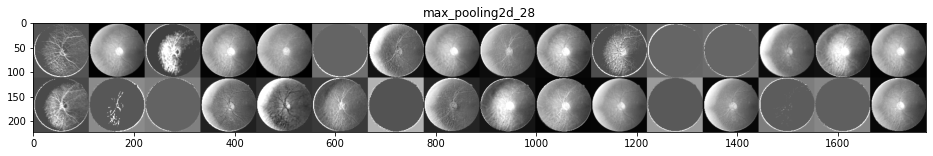

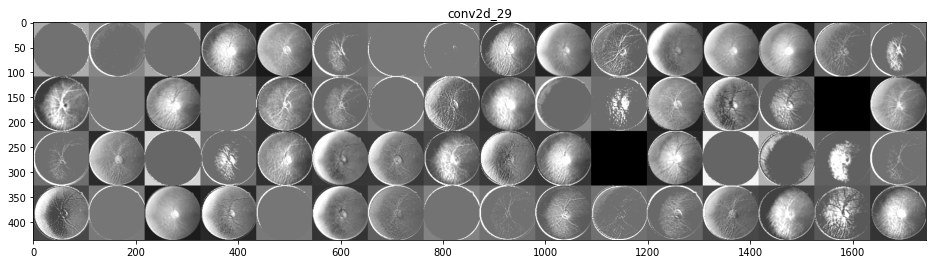

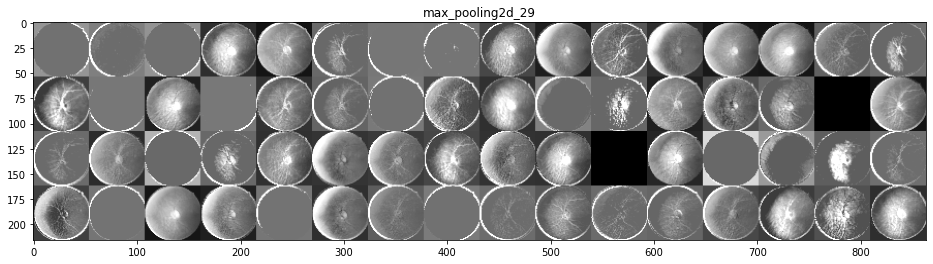

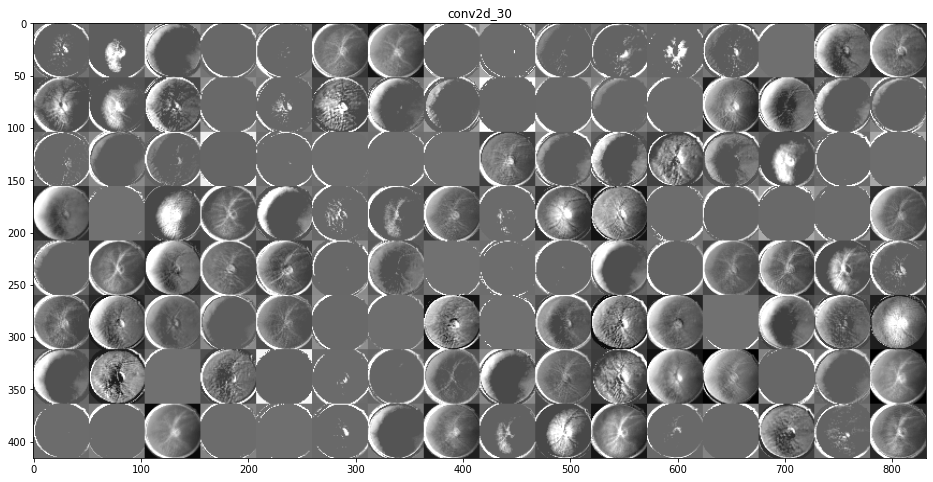

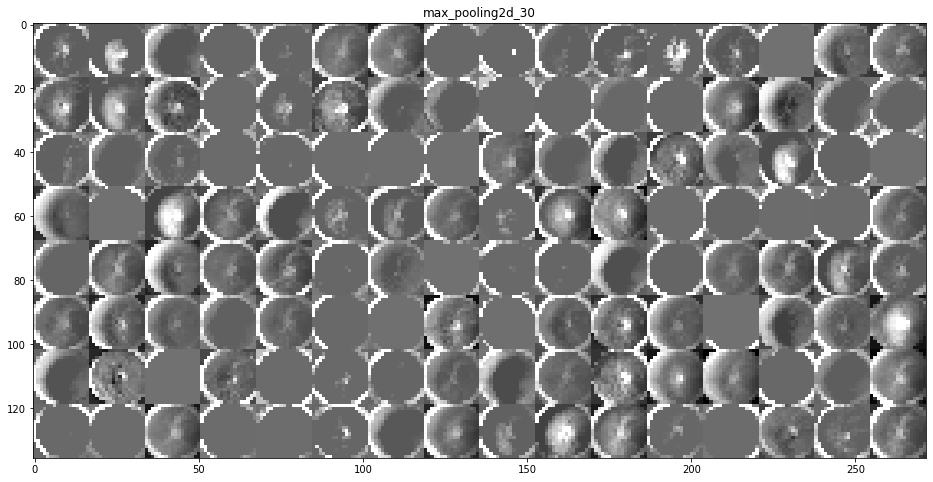

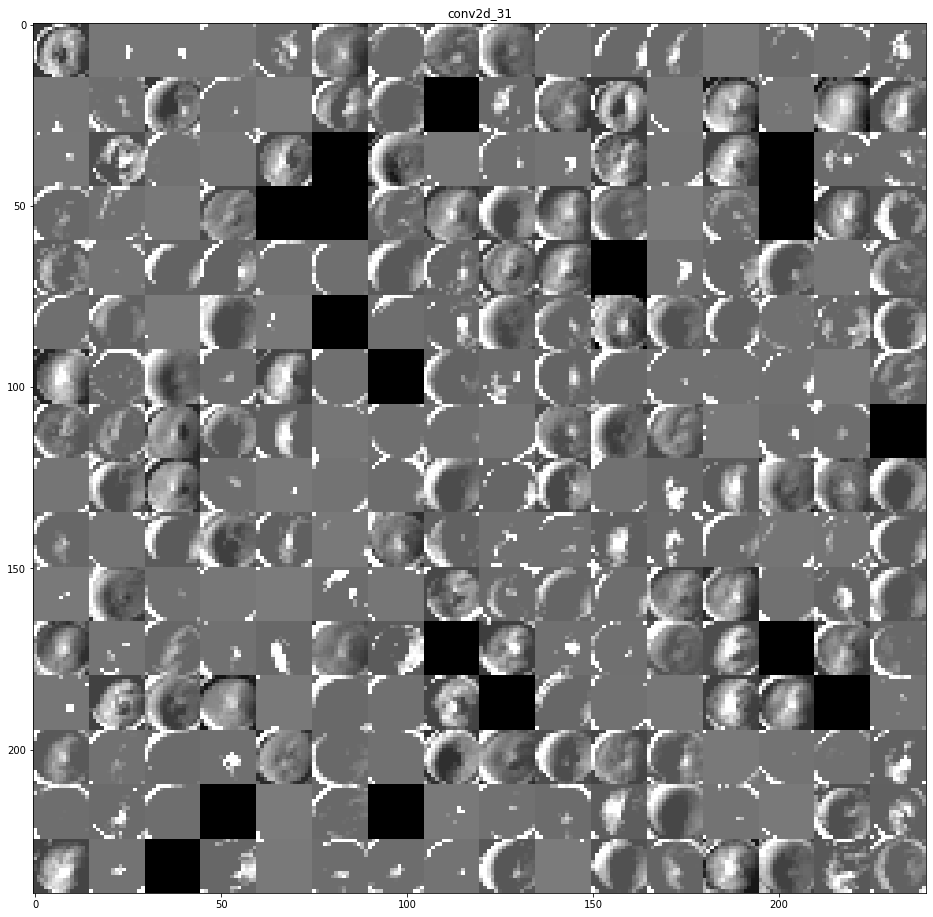

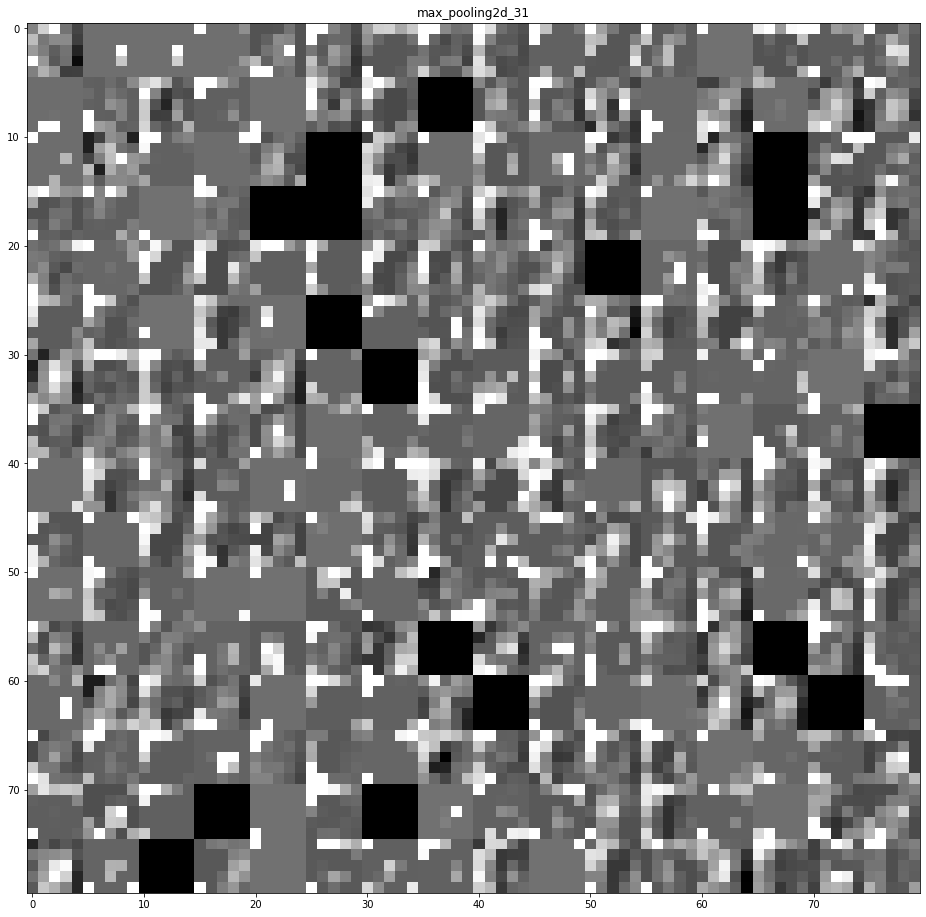

In [ ]:
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')
    
plt.show()

## VGG16

In [ ]:
model_path = ('/content/drive/Shareddrives/DeepLearningProject/models/VGG16/pretrained_VGG16_exp5_onmodel3_638c_0001_Adam.h5')

In [ ]:
model = tf.keras.models.load_model(model_path)

model.summary()

model = model.get_layer('vgg16')

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        print(layer.name)
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_3   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_3 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                           

In [ ]:
activations = activation_model.predict(img_tensor)
for out in activations:
  print(out.shape)

(1, 224, 224, 64)
(1, 224, 224, 64)
(1, 112, 112, 64)
(1, 112, 112, 128)
(1, 112, 112, 128)
(1, 56, 56, 128)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 28, 28, 256)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 7, 7, 512)


In [ ]:
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')
    
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## MobileNet

In [ ]:
model_path = ('/content/drive/Shareddrives/DeepLearningProject/models/MobileNet/pretrained_MobileNet_exp4_adam_638c_0001.h5')

In [ ]:
model = tf.keras.models.load_model(model_path)

model.summary()

model = model.get_layer('mobilenetv2_1.00_224')

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        print(layer.name)
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                  

In [ ]:
activations = activation_model.predict(img_tensor)
for out in activations:
  print(out.shape)

(1, 112, 112, 32)
(1, 112, 112, 16)
(1, 112, 112, 96)
(1, 56, 56, 24)
(1, 56, 56, 144)
(1, 56, 56, 24)
(1, 56, 56, 144)
(1, 28, 28, 32)
(1, 28, 28, 192)
(1, 28, 28, 32)
(1, 28, 28, 192)
(1, 28, 28, 32)
(1, 28, 28, 192)
(1, 14, 14, 64)
(1, 14, 14, 384)
(1, 14, 14, 64)
(1, 14, 14, 384)
(1, 14, 14, 64)
(1, 14, 14, 384)
(1, 14, 14, 64)
(1, 14, 14, 384)
(1, 14, 14, 96)
(1, 14, 14, 576)
(1, 14, 14, 96)
(1, 14, 14, 576)
(1, 14, 14, 96)
(1, 14, 14, 576)
(1, 7, 7, 160)
(1, 7, 7, 960)
(1, 7, 7, 160)
(1, 7, 7, 960)
(1, 7, 7, 160)
(1, 7, 7, 960)
(1, 7, 7, 320)
(1, 7, 7, 1280)


In [ ]:
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')
    
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Heatmaps


In [ ]:
def get_img_array(img_path, target_size):
  img = keras.utils.load_img(img_path, target_size=target_size)
  array = keras.utils.img_to_array(img)
  array = np.expand_dims(array, axis=0)
  return array

def get_last_conv_layer_index (model):
  index = 0
  i = 0
  for i, layer in enumerate(model.layers):
    if len(layer.output_shape) == 4:
      index = i # each time we found a conv layer we update the index
  if index == 0: # no conv layers
    raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
  return index

def compute_gradcam(img_path, heatmap, alpha=0.4):
  img = keras.preprocessing.image.load_img(img_path)
  img = keras.preprocessing.image.img_to_array(img)

  heatmap = np.uint8(255 * heatmap)

  jet = cm.get_cmap("jet")

  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  jet_heatmap = keras.utils.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.utils.img_to_array(jet_heatmap)

  superimposed_img = jet_heatmap * alpha + img
  superimposed_img = keras.utils.array_to_img(superimposed_img)
  return superimposed_img

def make_heatmap (img_array, model, last_conv_layer_index, class_index):

  intermediate_layer_model = keras.Model(inputs=model.inputs, outputs=model.layers[last_conv_layer_index + 1].input)
  classifier_model = Model([model.layers[last_conv_layer_index + 1].input], model.output)

  with tf.GradientTape() as tape:
    last_conv_layer_output = intermediate_layer_model(img_array)
    prediction = classifier_model(last_conv_layer_output)
    tape.watch([last_conv_layer_output, prediction])
    if class_index == 0: # hem class
      prediction = 1 - prediction

  grads = tape.gradient(prediction, last_conv_layer_output)

  pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy() 
  weighted_last_conv_layer_output = last_conv_layer_output.numpy()[0]
  for i in range(pooled_grads.shape[-1]):
    weighted_last_conv_layer_output[:, :, i] *= pooled_grads[i] 

  heatmap = np.mean(weighted_last_conv_layer_output, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  return heatmap

def print_heatmaps(heatmap_scratch, heatmap_vgg, scratch_gradcam, vgg_gradcam):
  fig = plt.figure(figsize=(10, 10))

  fig.add_subplot(2, 2, 1)
  plt.imshow(heatmap_scratch)
  plt.title("CNN from scratch")

  fig.add_subplot(2, 2, 2)
  plt.imshow(heatmap_vgg)
  plt.title("VGG16")

  fig.add_subplot(2, 2, 3)
  plt.imshow(scratch_gradcam)
  plt.title("CNN from scratch")

  fig.add_subplot(2, 2, 4)
  plt.imshow(vgg_gradcam)
  plt.title("VGG16")

def calculate_heatmaps(img_path, cnn_scratch, vgg16):
  img_array = get_img_array(img_path, target_size=(224, 224))

  scratch_predictions = cnn_scratch.predict(img_array)
  heatmap_scratch = make_heatmap(img_array, cnn_scratch, get_last_conv_layer_index(cnn_scratch), 0)

  vgg_predictions = vgg16.predict(img_array)
  heatmap_vgg = make_heatmap(img_array, vgg16, get_last_conv_layer_index(vgg16), 0)


  print("CNN from scratch: ", scratch_predictions[0][0])
  print("VGG16: ", vgg_predictions[0][0])

  scratch_gradcam = compute_gradcam(img_path, heatmap_scratch)
  vgg_gradcam = compute_gradcam(img_path, heatmap_vgg)

  return heatmap_scratch, heatmap_vgg, scratch_gradcam, vgg_gradcam

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)

img_tensor = np.expand_dims(img_tensor, axis=0)

# Its shape is (1, 180, 180, 1)
print(img_tensor.shape)

(1, 224, 224, 3)


In [ ]:
cnn_scratch = tf.keras.models.load_model('/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/59_model3.hdf5')
vgg16 = tf.keras.models.load_model('/content/drive/Shareddrives/DeepLearningProject/models/VGG16/pretrained_VGG16_exp5_onmodel3_638c_0001_Adam.h5')
mobilenet = tf.keras.models.load_model('/content/drive/Shareddrives/DeepLearningProject/models/MobileNet/pretrained_MobileNet_exp4_adam_638c_0001.h5')

OSError: ignored

## Class 0

CNN from scratch:  0.42124137
VGG16:  0.48229876


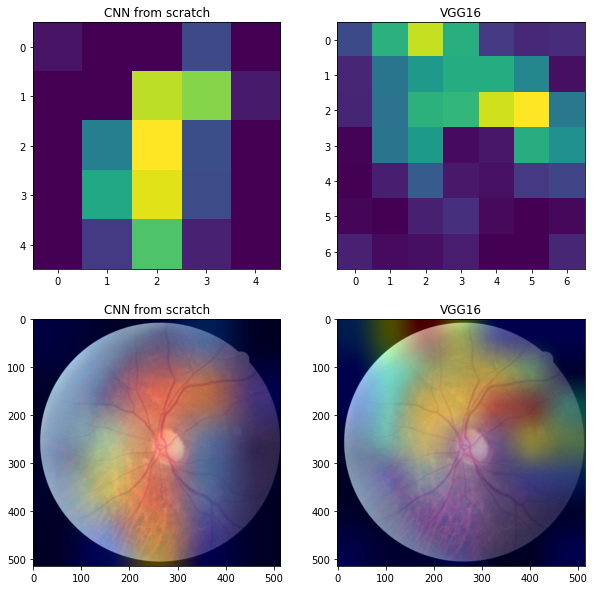

In [ ]:
heatmap_scratch, heatmap_vgg, scratch_gradcam, vgg_gradcam = calculate_heatmaps(img_path, cnn_scratch, vgg16)


## Class 1

CNN from scratch:  0.29121456
VGG16:  0.9404072


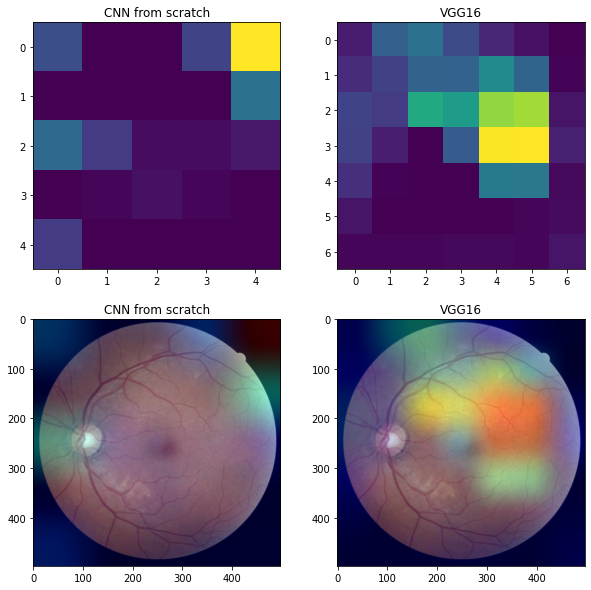

In [ ]:
heatmap_scratch, heatmap_vgg, scratch_gradcam, vgg_gradcam = calculate_heatmaps('/content/drive/Shareddrives/DeepLearningProject/heatmaps/class1-1.jpeg', cnn_scratch, vgg16)
print_heatmaps(heatmap_scratch, heatmap_vgg, scratch_gradcam, vgg_gradcam)

## Class 2

CNN from scratch:  0.34158796
VGG16:  0.5867578


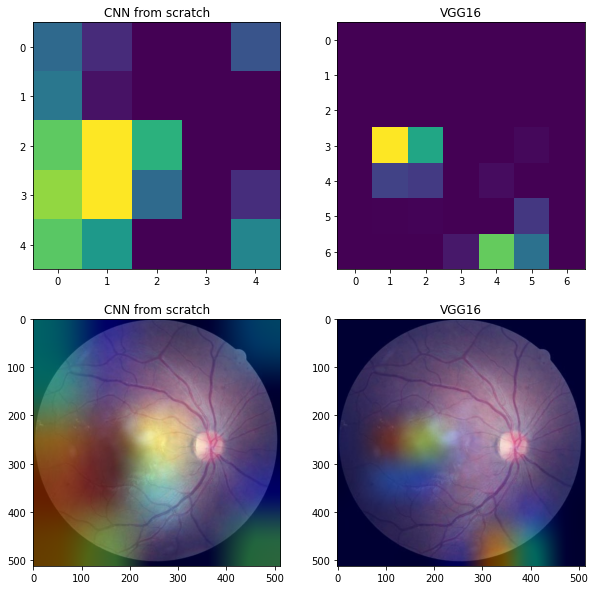

In [ ]:
heatmap_scratch, heatmap_vgg, scratch_gradcam, vgg_gradcam = calculate_heatmaps('/content/drive/Shareddrives/DeepLearningProject/heatmaps/class2-7.jpeg', cnn_scratch, vgg16)
print_heatmaps(heatmap_scratch, heatmap_vgg, scratch_gradcam, vgg_gradcam)

## Class 3

CNN from scratch:  0.34128335
VGG16:  6.3429375e-12


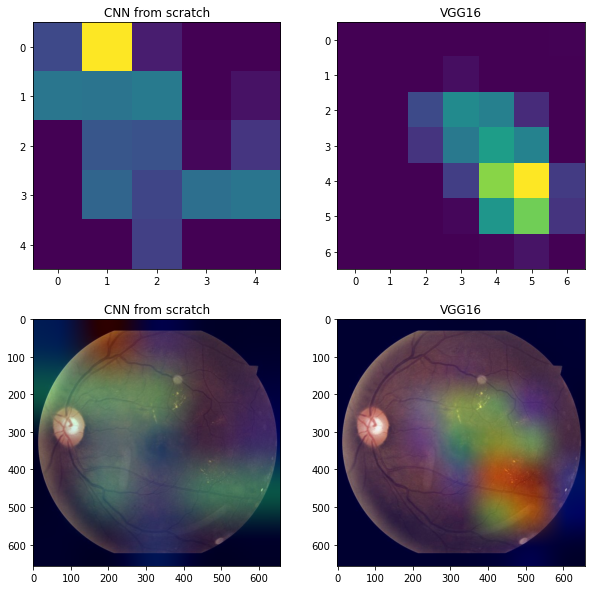

In [ ]:
heatmap_scratch, heatmap_vgg, scratch_gradcam, vgg_gradcam = calculate_heatmaps('/content/drive/Shareddrives/DeepLearningProject/heatmaps/class3.jpeg', cnn_scratch, vgg16)
print_heatmaps(heatmap_scratch, heatmap_vgg, scratch_gradcam, vgg_gradcam)

## Class 4

In [ ]:
heatmap_scratch, heatmap_vgg, scratch_gradcam, vgg_gradcam = calculate_heatmaps('/content/drive/Shareddrives/DeepLearningProject/heatmaps/class4-16.jpeg', cnn_scratch, vgg16)
print_heatmaps(heatmap_scratch, heatmap_vgg, scratch_gradcam, vgg_gradcam)

NameError: ignored